In [ ]:
import tensorflow as tf
from google.colab import files


In [ ]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Set the search parameters
filename = 'training_dataset_AVG_PL_prediction.xlsx'
search_path = '/content/drive/My Drive'

# Search for the file
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file_path_test_data = os.path.join(root, filename)
        print(file_path_test_data)
        break

/content/drive/My Drive/training_dataset_AVG_PL_prediction.xlsx


In [ ]:
Test_data = pd.read_excel(file_path_test_data)


In [ ]:
Test_data.head()

,index_rx,Receiver_XX,Receiver_YY,no_visible_walls,avg_distance_to_walls,min_distace_to_walls,Phi,Theta,3d_distance,walls_pen,indoor_distance,outdoor_distance,min_wall_height,max_wall_height,avg_wall_height,Transmitter_XX,Transmitter_YY,Transmitter_ZZ,Path_loss,Path_loss_average
0,748,7.85808,181.803,4,288.293,17.6320,7.74421,232.600,173.659,6,76.4516,95.6237,20,24,21.3333,112.375,318.5,25,128.197,127.352500
1,831,9.71649,186.445,5,300.784,14.7145,7.96414,232.140,168.893,6,74.2152,93.0493,20,24,21.3333,112.375,318.5,25,126.508,126.454333
2,914,11.57490,191.086,6,264.019,13.1205,8.19623,231.653,164.142,6,71.9904,90.4747,20,24,21.3333,112.375,318.5,25,124.658,125.706333
3,997,13.43330,195.728,7,293.251,13.3333,8.44153,231.136,159.405,6,69.7777,87.9004,20,24,21.3333,112.375,318.5,25,125.953,126.207000
4,1080,15.29170,200.370,6,260.190,15.2776,8.70109,230.587,154.685,6,67.5779,85.3268,20,24,21.3333,112.375,318.5,25,128.010,126.452333


In [ ]:
Test_data.head()
print('Test_data.shape() = ', Test_data.shape)

Test_data.shape() =  (158406, 20)


In [ ]:
Test_data = Test_data.drop(['index_rx','Receiver_XX','Receiver_YY','Transmitter_XX','Transmitter_YY','Path_loss'], axis=1)# Added by Ramzan

In [ ]:
Test_data.head() #added By Ramzan
print('Test_data.shape() = ', Test_data.shape)

Test_data.shape() =  (158406, 14)


In [ ]:
import os

# Set the search parameters
filename = 'validation_set_02_tx45.xlsx'
search_path = '/content/drive/My Drive'

# Search for the file
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file_path_Validation_data_45 = os.path.join(root, filename)
        print(file_path_Validation_data_45)
        break

/content/drive/My Drive/validation_set_02_tx45.xlsx


In [ ]:
Validation_data_45 = pd.read_excel(file_path_Validation_data_45)


In [ ]:
Validation_data_45.head()

,no_visible_walls,avg_distance_to_walls,min_distace_to_walls,Phi,Theta,3d_distance,walls_pen,indoor_distance,outdoor_distance,min_wall_height,max_wall_height,avg_wall_height,Transmitter_ZZ,Path_loss_average
0,14,201.003,15.1203,8.14823,258.122,306.215,8,125.496,177.628,22,22,22.0,45,112.17250
1,10,240.240,12.8579,8.28092,258.288,301.342,8,127.963,170.237,22,22,22.0,45,113.21350
2,10,224.410,16.3888,8.25815,259.234,302.167,6,127.981,171.054,22,22,22.0,45,110.04500
3,9,276.545,49.0753,8.41790,258.459,296.473,8,128.921,164.358,22,22,22.0,45,110.46325
4,9,243.161,21.8916,8.39394,259.420,297.313,4,125.550,168.579,22,22,22.0,45,111.43275


In [ ]:
Validation_data_45.shape

(2925, 14)

In [ ]:
import os

# Set the search parameters
filename = 'validation_set_03_tx25.xlsx'
search_path = '/content/drive/My Drive'

# Search for the file
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file_path_Validation_data_25 = os.path.join(root, filename)
        print(file_path_Validation_data_25)
        break

/content/drive/My Drive/validation_set_03_tx25.xlsx


In [ ]:
Validation_data_25 = pd.read_excel(file_path_Validation_data_25)


In [ ]:
Validation_data_25.head()

,no_visible_walls,avg_distance_to_walls,min_distace_to_walls,Phi,Theta,3d_distance,walls_pen,indoor_distance,outdoor_distance,min_wall_height,max_wall_height,avg_wall_height,Transmitter_ZZ,Path_loss_average
0,16,44.0864,13.65990,3.51035,219.638,382.184,4,54.0919,327.375,20,21,20.5000,25,113.183000
1,17,86.7368,9.69712,3.66338,224.418,366.240,6,56.3919,309.100,20,23,21.6667,25,118.067333
2,16,46.0069,9.03782,3.68412,225.134,364.180,6,54.5189,308.909,20,23,21.6667,25,117.996000
3,17,41.5470,12.36050,3.52759,218.621,380.319,4,60.2953,319.303,20,21,20.5000,25,111.872000
4,22,87.2039,11.30200,3.70964,224.098,361.679,6,55.5572,305.364,20,23,21.6667,25,116.848667


In [ ]:
Validation_data_25.shape

(1517, 14)

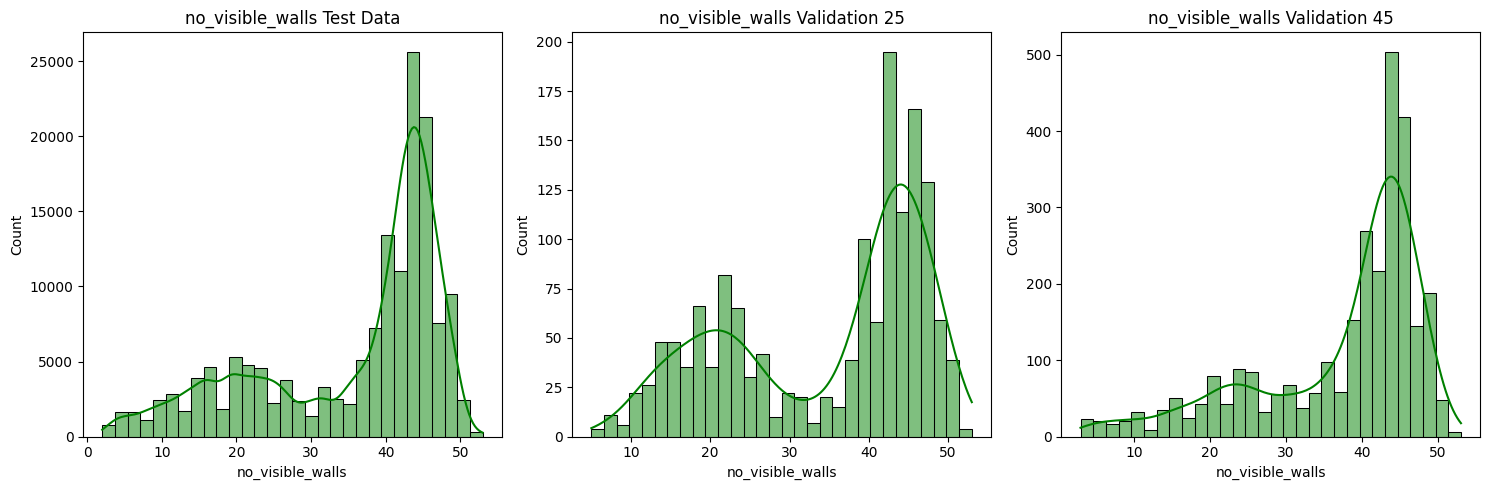

In [ ]:

# Set the color palette
#sns.set_palette('colorblind')

# Create a figure and a grid of subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Path Loss Distribution with KDE for Test Data
sns.histplot(Test_data['no_visible_walls'], kde=True, bins=30, ax=axes[0], color='green')
axes[0].set_xlabel("no_visible_walls")
axes[0].set_ylabel("Count")
axes[0].set_title("no_visible_walls Test Data")

# Plot 2: Path Loss Distribution with KDE for Validation 25 Data
sns.histplot(Validation_data_25['no_visible_walls'], kde=True, bins=30, ax=axes[1], color='green')
axes[1].set_xlabel("no_visible_walls")
axes[1].set_ylabel("Count")
axes[1].set_title("no_visible_walls Validation 25")

# Plot 3: Path Loss Distribution with KDE for Validation 45 Data
sns.histplot(Validation_data_45['no_visible_walls'], kde=True, bins=30, ax=axes[2], color='green')
axes[2].set_xlabel("no_visible_walls")
axes[2].set_ylabel("Count")
axes[2].set_title("no_visible_walls Validation 45")

# Adjust the layout and save the figure
plt.tight_layout()

# Show the plots
plt.show()

Use sns.displot(data=df, x='parameter_column', kind="kde")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

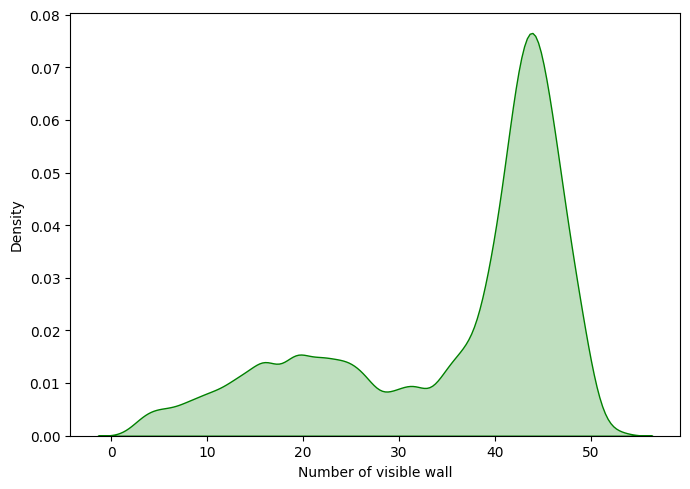

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the color palette
sns.set_palette('colorblind')

# Create a figure and a grid of subplots (1 row, 1 column)
fig, axes = plt.subplots(1, 1, figsize=(7, 5))

# Plot 1: Path Loss Distribution with KDE for Test Data
sns.kdeplot(data=Test_data, x='no_visible_walls', ax=axes, color='green', fill=True)
axes.set_xlabel("Number of visible wall")
axes.set_ylabel("Density")

# Adjust the layout and save the figure
plt.tight_layout()
plt.savefig('Number of visible wall.eps', dpi=600, bbox_inches='tight')  # Change the file name and dpi as needed
# Move the saved file to the content folder
!mv 'Number of visible wall.eps' '/content/drive/My Drive/ESP files/Number_of_visible_wall.eps'

files.download('/content/drive/My Drive/ESP files/Number_of_visible_wall.eps')

# Show the plot
plt.show()


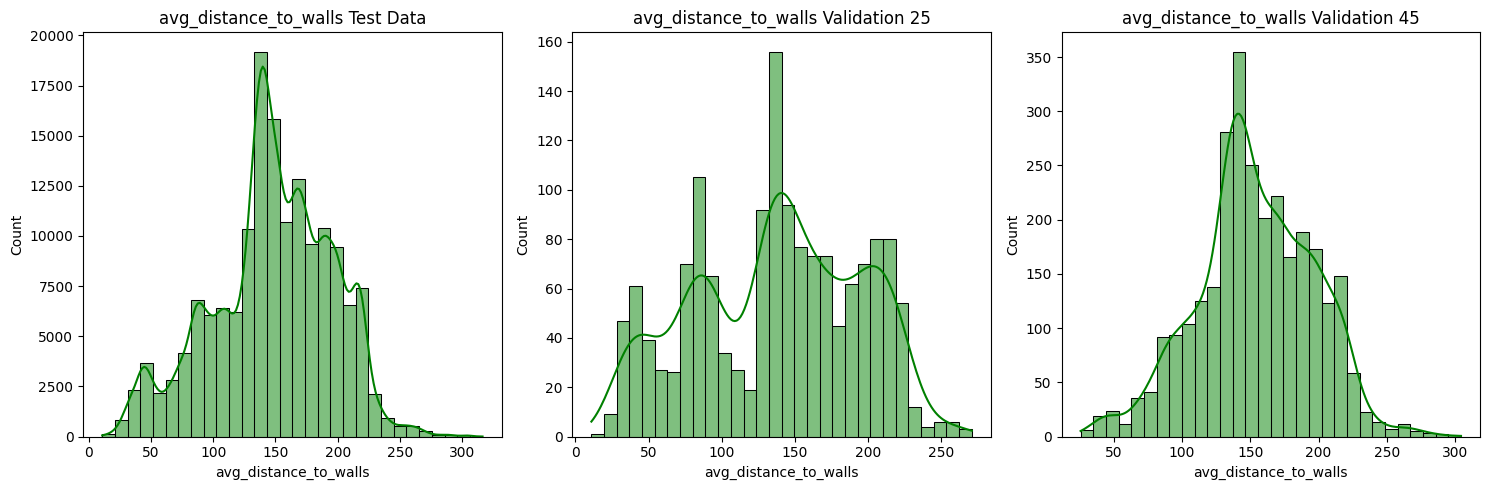

In [ ]:

# Set the color palette
#sns.set_palette('colorblind')

# Create a figure and a grid of subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Path Loss Distribution with KDE for Test Data
sns.histplot(Test_data['avg_distance_to_walls'], kde=True, bins=30, ax=axes[0], color='green')
axes[0].set_xlabel("avg_distance_to_walls")
axes[0].set_ylabel("Count")
axes[0].set_title("avg_distance_to_walls Test Data")

# Plot 2: Path Loss Distribution with KDE for Validation 25 Data
sns.histplot(Validation_data_25['avg_distance_to_walls'], kde=True, bins=30, ax=axes[1], color='green')
axes[1].set_xlabel("avg_distance_to_walls")
axes[1].set_ylabel("Count")
axes[1].set_title("avg_distance_to_walls Validation 25")

# Plot 3: Path Loss Distribution with KDE for Validation 45 Data
sns.histplot(Validation_data_45['avg_distance_to_walls'], kde=True, bins=30, ax=axes[2], color='green')
axes[2].set_xlabel("avg_distance_to_walls")
axes[2].set_ylabel("Count")
axes[2].set_title("avg_distance_to_walls Validation 45")

# Adjust the layout and save the figure
plt.tight_layout()

# Show the plots
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

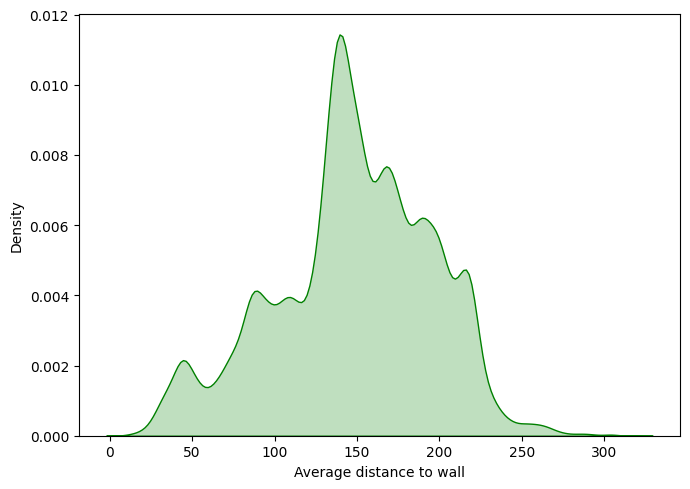

In [ ]:
# Create a figure and a grid of subplots (1 row, 1 column)
fig, axes = plt.subplots(1, 1, figsize=(7, 5))

# Plot: Path Loss Distribution with KDE for Test Data
sns.kdeplot(data=Test_data, x='avg_distance_to_walls', ax=axes, color='green', fill=True)
axes.set_xlabel("Average distance to wall")
axes.set_ylabel("Density")

# Adjust the layout and save the figure
plt.tight_layout()
plt.savefig('Average distance to wall.eps', dpi=600, bbox_inches='tight')  # Change the file name and dpi as needed
# Move the saved file to the content folder
!mv 'Average distance to wall.eps' '/content/drive/My Drive/ESP files/Average_distance_to_wall.eps'

files.download('/content/drive/My Drive/ESP files/Average_distance_to_wall.eps')
# Show the plot
plt.show()


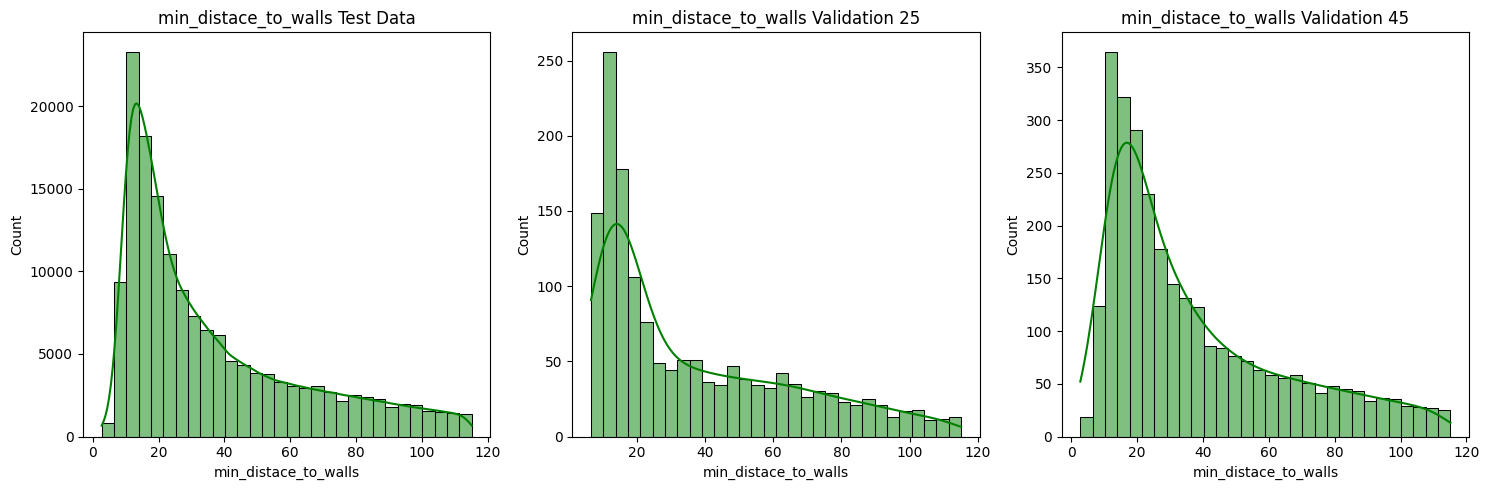

In [ ]:

# Set the color palette
#sns.set_palette('colorblind')

# Create a figure and a grid of subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Path Loss Distribution with KDE for Test Data
sns.histplot(Test_data['min_distace_to_walls'], kde=True, bins=30, ax=axes[0], color='green')
axes[0].set_xlabel("min_distace_to_walls")
axes[0].set_ylabel("Count")
axes[0].set_title("min_distace_to_walls Test Data")

# Plot 2: Path Loss Distribution with KDE for Validation 25 Data
sns.histplot(Validation_data_25['min_distace_to_walls'], kde=True, bins=30, ax=axes[1], color='green')
axes[1].set_xlabel("min_distace_to_walls")
axes[1].set_ylabel("Count")
axes[1].set_title("min_distace_to_walls Validation 25")

# Plot 3: Path Loss Distribution with KDE for Validation 45 Data
sns.histplot(Validation_data_45['min_distace_to_walls'], kde=True, bins=30, ax=axes[2], color='green')
axes[2].set_xlabel("min_distace_to_walls")
axes[2].set_ylabel("Count")
axes[2].set_title("min_distace_to_walls Validation 45")

# Adjust the layout and save the figure
plt.tight_layout()

# Show the plots
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

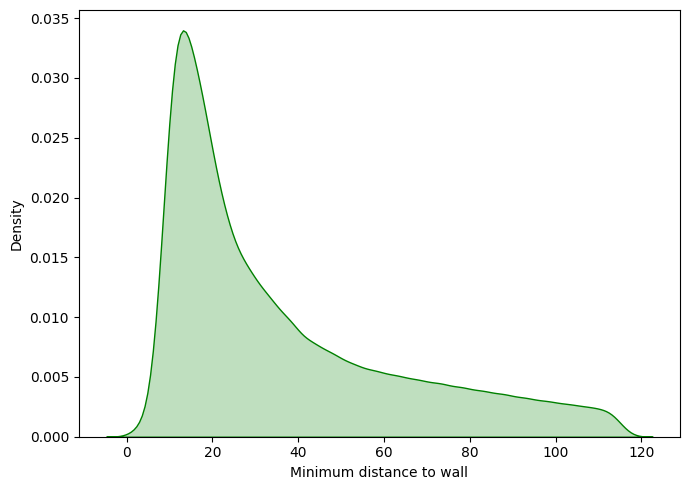

In [ ]:
# Create a figure and a grid of subplots (1 row, 1 column)
fig, axes = plt.subplots(1, 1, figsize=(7, 5))

# Plot: Path Loss Distribution with KDE for Test Data
sns.kdeplot(data=Test_data, x='min_distace_to_walls', ax=axes, color='green', fill=True)
axes.set_xlabel("Minimum distance to wall")
axes.set_ylabel("Density")

# Adjust the layout and save the figure
plt.tight_layout()
plt.savefig('Minimum distance to wall.eps', dpi=600, bbox_inches='tight')  # Change the file name and dpi as needed
# Move the saved file to the content folder
!mv 'Minimum distance to wall.eps' '/content/drive/My Drive/ESP files/Minimum_distance_to_wall.eps'

files.download('/content/drive/My Drive/ESP files/Minimum_distance_to_wall.eps')
# Show the plot
plt.show()


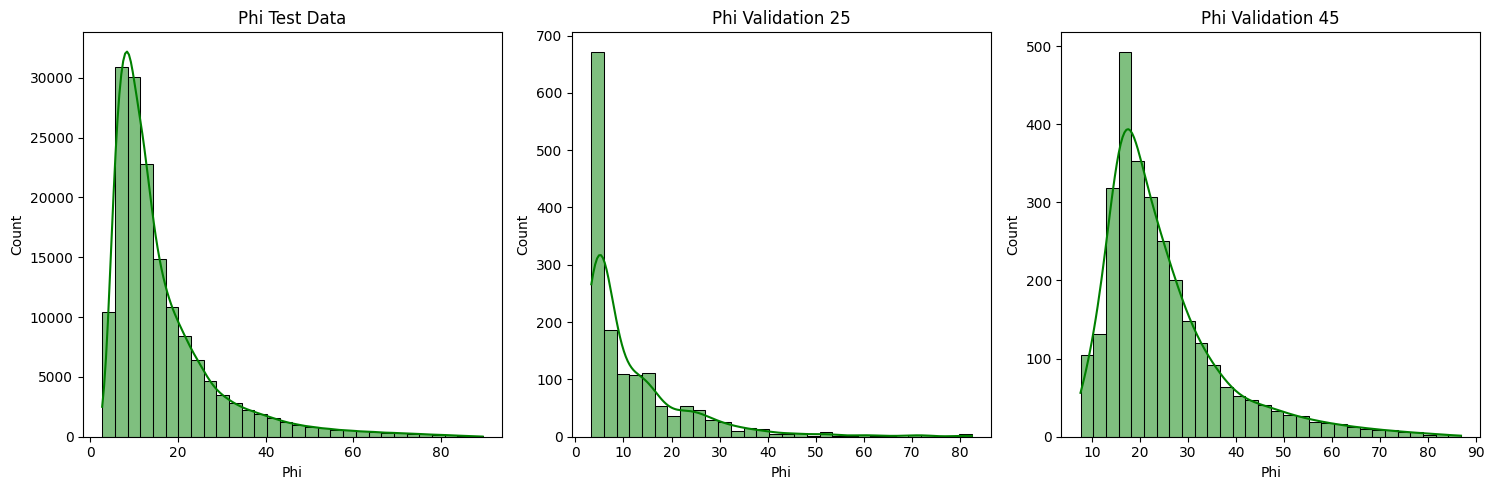

In [ ]:

# Set the color palette
#sns.set_palette('colorblind')

# Create a figure and a grid of subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Path Loss Distribution with KDE for Test Data
sns.histplot(Test_data['Phi'], kde=True, bins=30, ax=axes[0], color='green')
axes[0].set_xlabel("Phi")
axes[0].set_ylabel("Count")
axes[0].set_title("Phi Test Data")

# Plot 2: Path Loss Distribution with KDE for Validation 25 Data
sns.histplot(Validation_data_25['Phi'], kde=True, bins=30, ax=axes[1], color='green')
axes[1].set_xlabel("Phi")
axes[1].set_ylabel("Count")
axes[1].set_title("Phi Validation 25")

# Plot 3: Path Loss Distribution with KDE for Validation 45 Data
sns.histplot(Validation_data_45['Phi'], kde=True, bins=30, ax=axes[2], color='green')
axes[2].set_xlabel("Phi")
axes[2].set_ylabel("Count")
axes[2].set_title("Phi Validation 45")

# Adjust the layout and save the figure
plt.tight_layout()

# Show the plots
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

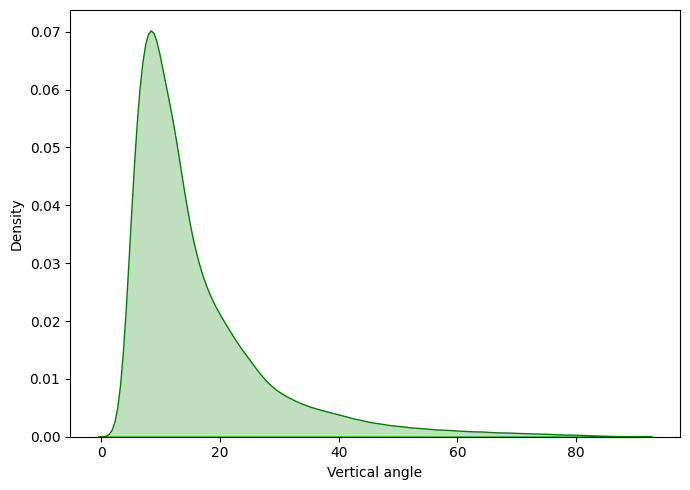

In [ ]:
# Create a figure and a grid of subplots (1 row, 1 column)
fig, axes = plt.subplots(1, 1, figsize=(7, 5))

# Plot: Path Loss Distribution with KDE for Test Data
sns.kdeplot(data=Test_data, x='Phi', ax=axes, color='green', fill=True)
axes.set_xlabel("Vertical angle")
axes.set_ylabel("Density")

# Adjust the layout and save the figure
plt.tight_layout()
plt.savefig('Vertical angle.eps', dpi=600, bbox_inches='tight')  # Change the file name and dpi as needed
# Move the saved file to the content folder
!mv 'Vertical angle.eps' '/content/drive/My Drive/ESP files/Vertical_angle.eps'

files.download('/content/drive/My Drive/ESP files/Vertical_angle.eps')
# Show the plot
plt.show()


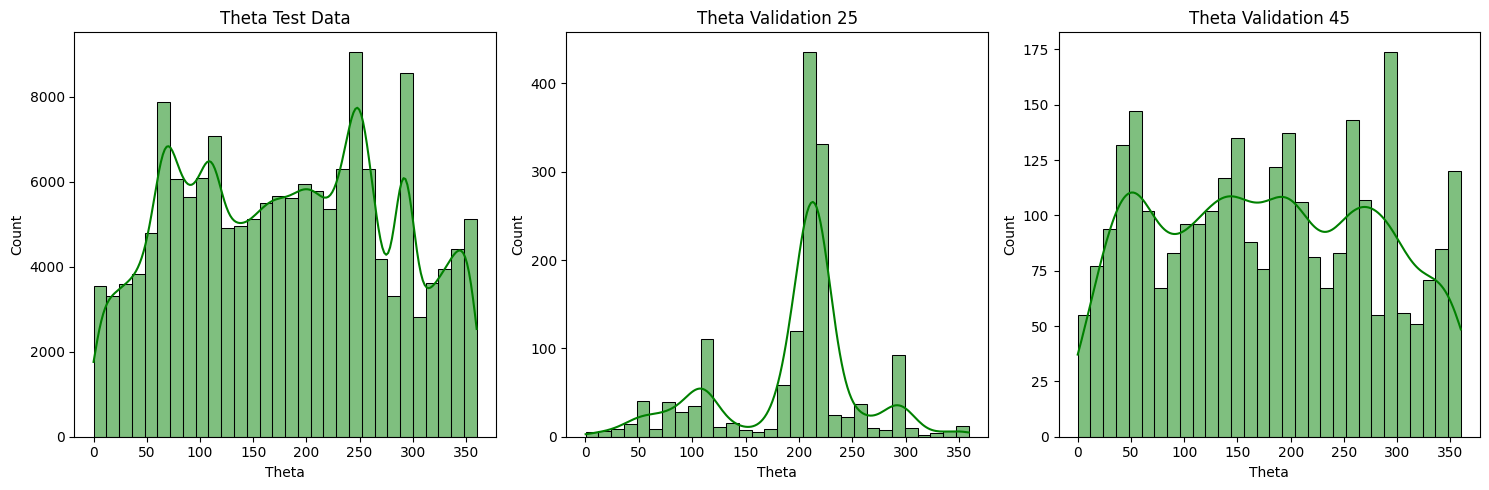

In [ ]:

# Set the color palette
#sns.set_palette('colorblind')

# Create a figure and a grid of subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Path Loss Distribution with KDE for Test Data
sns.histplot(Test_data['Theta'], kde=True, bins=30, ax=axes[0], color='green')
axes[0].set_xlabel("Theta")
axes[0].set_ylabel("Count")
axes[0].set_title("Theta Test Data")

# Plot 2: Path Loss Distribution with KDE for Validation 25 Data
sns.histplot(Validation_data_25['Theta'], kde=True, bins=30, ax=axes[1], color='green')
axes[1].set_xlabel("Theta")
axes[1].set_ylabel("Count")
axes[1].set_title("Theta Validation 25")

# Plot 3: Path Loss Distribution with KDE for Validation 45 Data
sns.histplot(Validation_data_45['Theta'], kde=True, bins=30, ax=axes[2], color='green')
axes[2].set_xlabel("Theta")
axes[2].set_ylabel("Count")
axes[2].set_title("Theta Validation 45")

# Adjust the layout and save the figure
plt.tight_layout()

# Show the plots
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

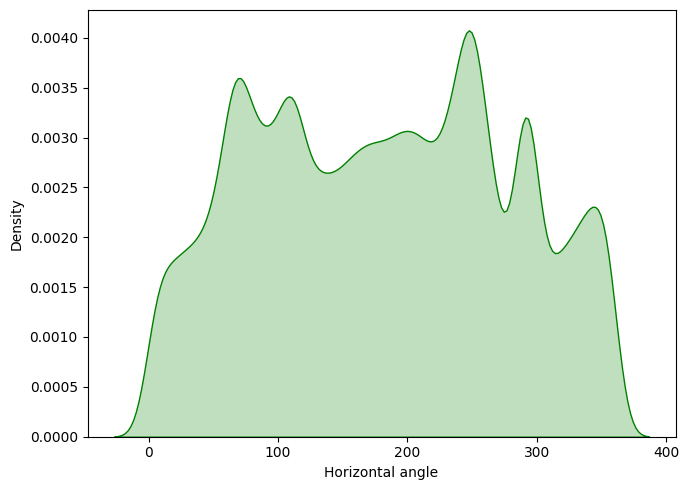

In [ ]:
# Create a figure and a grid of subplots (1 row, 1 column)
fig, axes = plt.subplots(1, 1, figsize=(7, 5))

# Plot: Path Loss Distribution with KDE for Test Data
sns.kdeplot(data=Test_data, x='Theta', ax=axes, color='green', fill=True)
axes.set_xlabel("Horizontal angle")
axes.set_ylabel("Density")

# Adjust the layout and save the figure
plt.tight_layout()
plt.savefig('Horizontal angle.eps', dpi=600, bbox_inches='tight')  # Change the file name and dpi as needed
# Move the saved file to the content folder
!mv 'Horizontal angle.eps' '/content/drive/My Drive/ESP files/Horizontal_angle.eps'

files.download('/content/drive/My Drive/ESP files/Horizontal_angle.eps')
# Show the plot
plt.show()


<ipython-input-29-08375844e5f2>:26: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


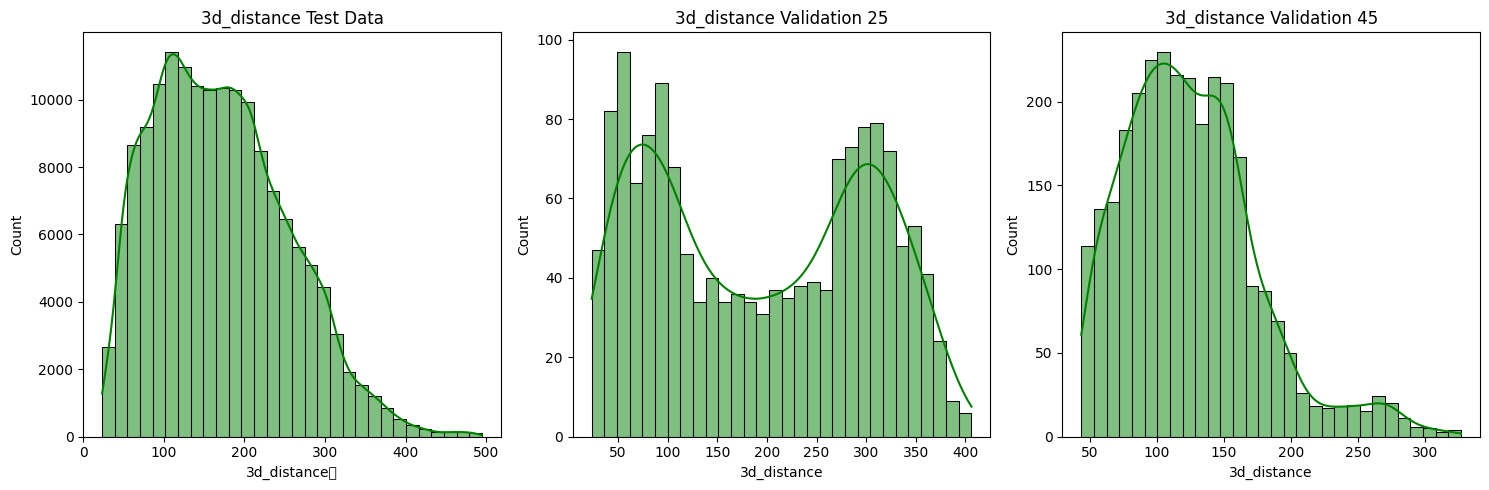

In [ ]:

# Set the color palette
#sns.set_palette('colorblind')

# Create a figure and a grid of subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Path Loss Distribution with KDE for Test Data
sns.histplot(Test_data['3d_distance'], kde=True, bins=30, ax=axes[0], color='green')
axes[0].set_xlabel("3d_distance	")
axes[0].set_ylabel("Count")
axes[0].set_title("3d_distance Test Data")

# Plot 2: Path Loss Distribution with KDE for Validation 25 Data
sns.histplot(Validation_data_25['3d_distance'], kde=True, bins=30, ax=axes[1], color='green')
axes[1].set_xlabel("3d_distance")
axes[1].set_ylabel("Count")
axes[1].set_title("3d_distance Validation 25")

# Plot 3: Path Loss Distribution with KDE for Validation 45 Data
sns.histplot(Validation_data_45['3d_distance'], kde=True, bins=30, ax=axes[2], color='green')
axes[2].set_xlabel("3d_distance")
axes[2].set_ylabel("Count")
axes[2].set_title("3d_distance Validation 45")

# Adjust the layout and save the figure
plt.tight_layout()

# Show the plots
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

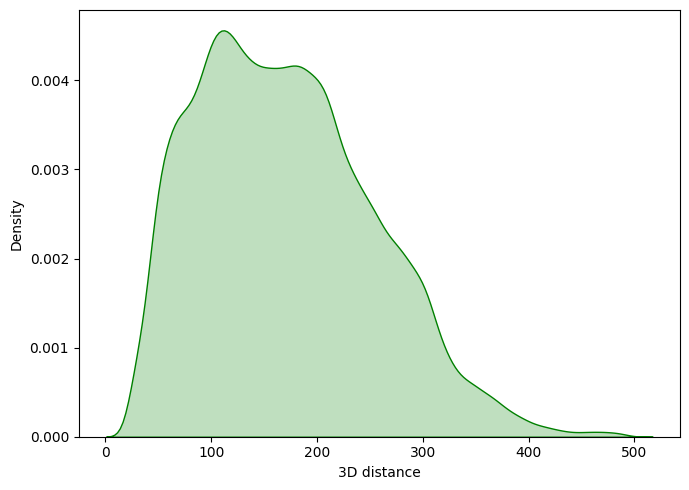

In [ ]:
# Create a figure and a grid of subplots (1 row, 1 column)
fig, axes = plt.subplots(1, 1, figsize=(7, 5))

# Plot: Path Loss Distribution with KDE for Test Data
sns.kdeplot(data=Test_data, x='3d_distance', ax=axes, color='green', fill=True)
axes.set_xlabel("3D distance")
axes.set_ylabel("Density")

# Adjust the layout and save the figure
plt.tight_layout()
plt.savefig('3D distance.eps', dpi=600, bbox_inches='tight')  # Change the file name and dpi as needed
# Move the saved file to the content folder
!mv '3D distance.eps' '/content/drive/My Drive/ESP files/3D_distance.eps'

files.download('/content/drive/My Drive/ESP files/3D_distance.eps')
# Show the plot
plt.show()


AttributeError: ignored

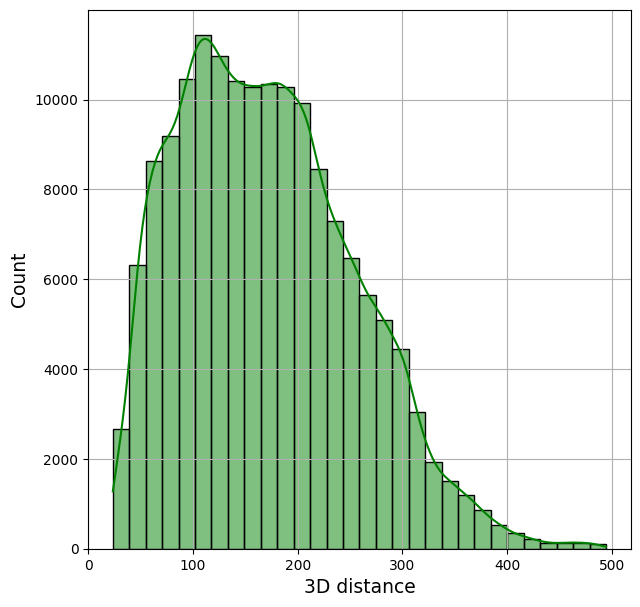

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new figure
distances = plt.figure(figsize=(7, 7))

# Plot the histogram with KDE
sns.histplot(Test_data['3d_distance'], kde=True, bins=30, color='green')

# Add labels and grid to the plot
plt.grid(True)
plt.xlabel('3D distance', fontsize=13.5)
plt.ylabel('Count', fontsize=13.5)
# Show the plot
distances.show()
distances.savefig('3D_distances_Test_data.eps', dpi=600, bbox_inches='tight')  # Change the file name and dpi as needed
files.download('3D_distances_Test_data.eps')



AttributeError: ignored

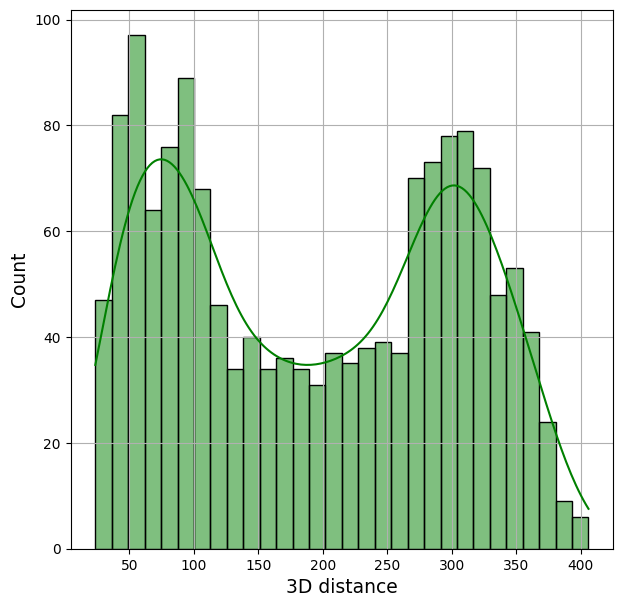

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new figure
distances = plt.figure(figsize=(7, 7))

# Plot the histogram with KDE
sns.histplot(Validation_data_25['3d_distance'], kde=True, bins=30, color='green')

# Add labels and grid to the plot
plt.grid(True)
plt.xlabel('3D distance', fontsize=13.5)
plt.ylabel('Count', fontsize=13.5)
# Show the plot
distances.show()
distances.savefig('3D_distances_Validation_data_25.eps', dpi=600, bbox_inches='tight')  # Change the file name and dpi as needed
files.download('3D_distances_Validation_data_25.eps')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

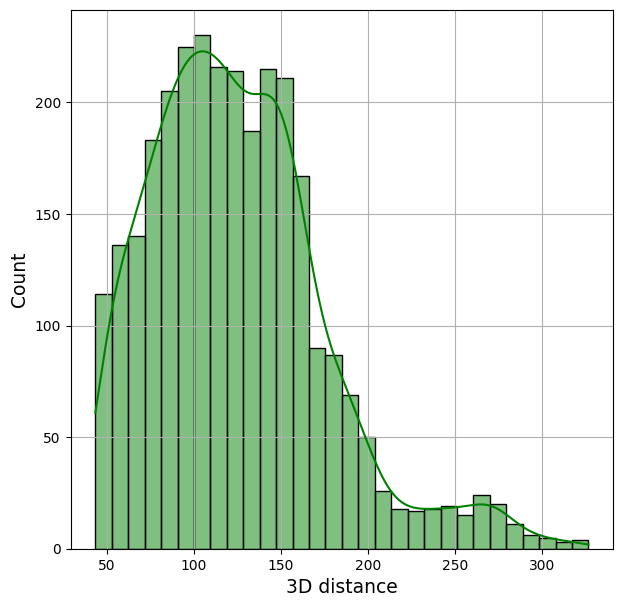

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new figure
distances = plt.figure(figsize=(7, 7))

# Plot the histogram with KDE
sns.histplot(Validation_data_45['3d_distance'], kde=True, bins=30, color='green')

# Add labels and grid to the plot
plt.grid(True)
plt.xlabel('3D distance', fontsize=13.5)
plt.ylabel('Count', fontsize=13.5)
# Show the plot
distances.show()
distances.savefig('3D_distances_Validation_data_45.eps', dpi=600, bbox_inches='tight')  # Change the file name and dpi as needed
files.download('3D_distances_Validation_data_45.eps')



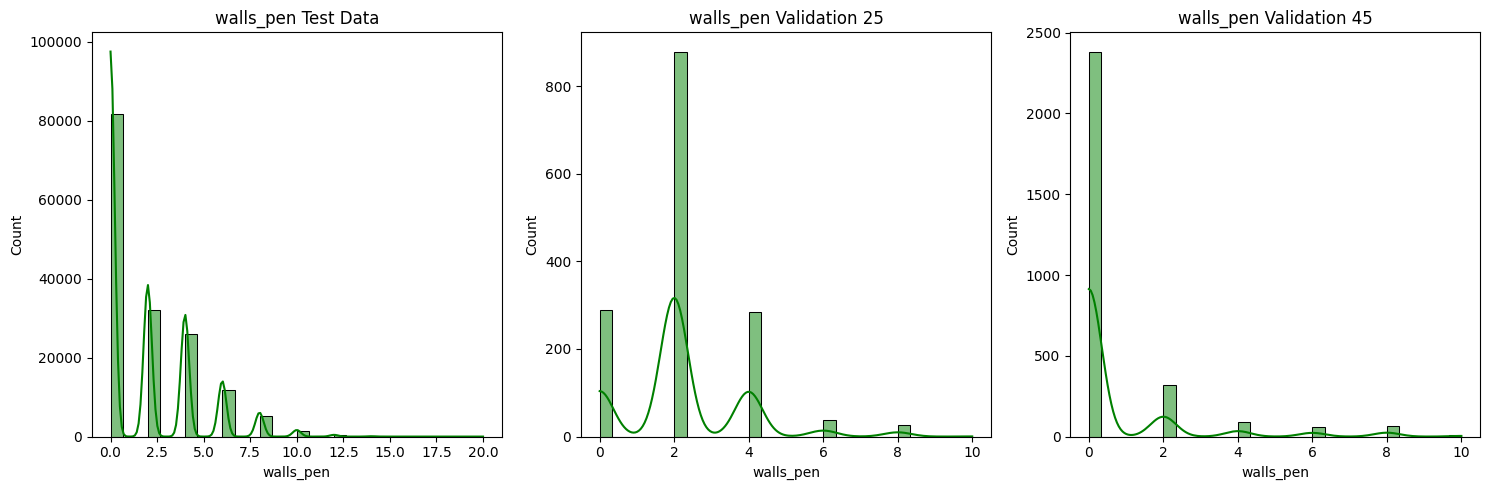

In [ ]:

# Set the color palette
#sns.set_palette('colorblind')

# Create a figure and a grid of subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Path Loss Distribution with KDE for Test Data
sns.histplot(Test_data['walls_pen'], kde=True, bins=30, ax=axes[0], color='green')
axes[0].set_xlabel("walls_pen")
axes[0].set_ylabel("Count")
axes[0].set_title("walls_pen Test Data")

# Plot 2: Path Loss Distribution with KDE for Validation 25 Data
sns.histplot(Validation_data_25['walls_pen'], kde=True, bins=30, ax=axes[1], color='green')
axes[1].set_xlabel("walls_pen")
axes[1].set_ylabel("Count")
axes[1].set_title("walls_pen Validation 25")

# Plot 3: Path Loss Distribution with KDE for Validation 45 Data
sns.histplot(Validation_data_45['walls_pen'], kde=True, bins=30, ax=axes[2], color='green')
axes[2].set_xlabel("walls_pen")
axes[2].set_ylabel("Count")
axes[2].set_title("walls_pen Validation 45")

# Adjust the layout and save the figure
plt.tight_layout()

# Show the plots
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

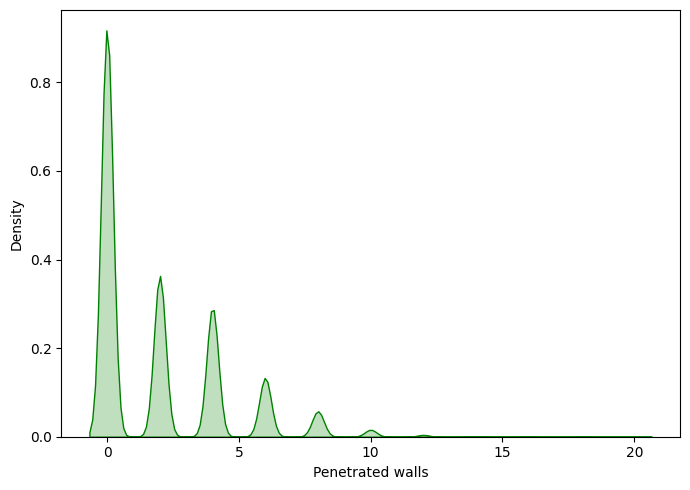

In [ ]:
# Create a figure and a grid of subplots (1 row, 1 column)
fig, axes = plt.subplots(1, 1, figsize=(7, 5))

# Plot: Path Loss Distribution with KDE for Test Data
sns.kdeplot(data=Test_data, x='walls_pen', ax=axes, color='green', fill=True)
axes.set_xlabel("Penetrated walls")
axes.set_ylabel("Density")

# Adjust the layout and save the figure
plt.tight_layout()
plt.savefig('Penetrated walls.eps', dpi=600, bbox_inches='tight')  # Change the file name and dpi as needed
# Move the saved file to the content folder
!mv 'Penetrated walls.eps' '/content/drive/My Drive/ESP files/Penetrated_walls.eps'

files.download('/content/drive/My Drive/ESP files/Penetrated_walls.eps')
# Show the plot
plt.show()


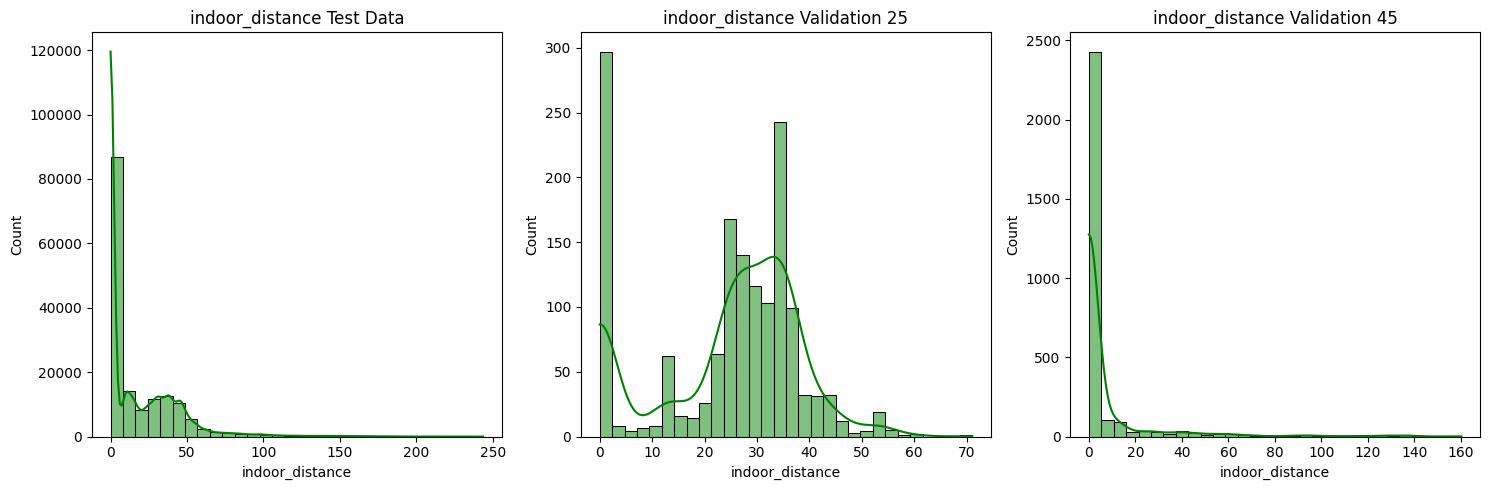

In [ ]:

# Set the color palette


# Create a figure and a grid of subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Path Loss Distribution with KDE for Test Data
sns.histplot(Test_data['indoor_distance'], kde=True, bins=30, ax=axes[0], color='green')
axes[0].set_xlabel("indoor_distance")
axes[0].set_ylabel("Count")
axes[0].set_title("indoor_distance Test Data")

# Plot 2: Path Loss Distribution with KDE for Validation 25 Data
sns.histplot(Validation_data_25['indoor_distance'], kde=True, bins=30, ax=axes[1], color='green')
axes[1].set_xlabel("indoor_distance")
axes[1].set_ylabel("Count")
axes[1].set_title("indoor_distance Validation 25")

# Plot 3: Path Loss Distribution with KDE for Validation 45 Data
sns.histplot(Validation_data_45['indoor_distance'], kde=True, bins=30, ax=axes[2], color='green')
axes[2].set_xlabel("indoor_distance")
axes[2].set_ylabel("Count")
axes[2].set_title("indoor_distance Validation 45")

# Adjust the layout and save the figure
plt.tight_layout()

# Show the plots
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

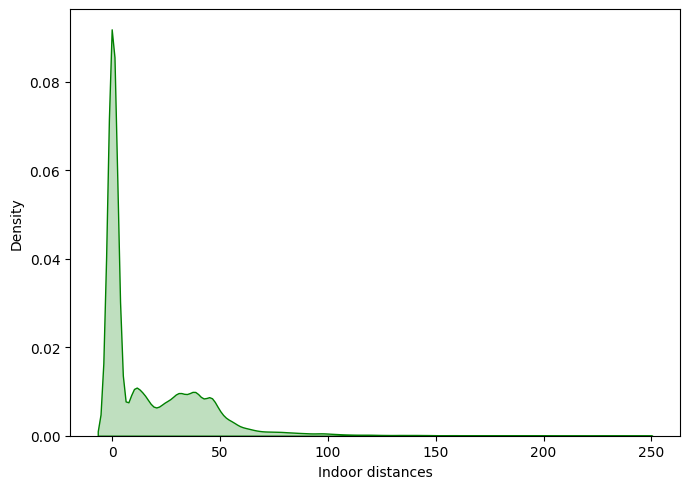

In [ ]:
# Create a figure and a grid of subplots (1 row, 1 column)
fig, axes = plt.subplots(1, 1, figsize=(7, 5))

# Plot: Path Loss Distribution with KDE for Test Data
sns.kdeplot(data=Test_data, x='indoor_distance', ax=axes, color='green', fill=True)
axes.set_xlabel("Indoor distances")
axes.set_ylabel("Density")

# Adjust the layout and save the figure
plt.tight_layout()
plt.savefig('Indoor distance.eps', dpi=600, bbox_inches='tight')  # Change the file name and dpi as needed
# Move the saved file to the content folder
!mv 'Indoor distance.eps' '/content/drive/My Drive/ESP files/Indoor_distance.eps'

files.download('/content/drive/My Drive/ESP files/Indoor_distance.eps')
# Show the plot
plt.show()


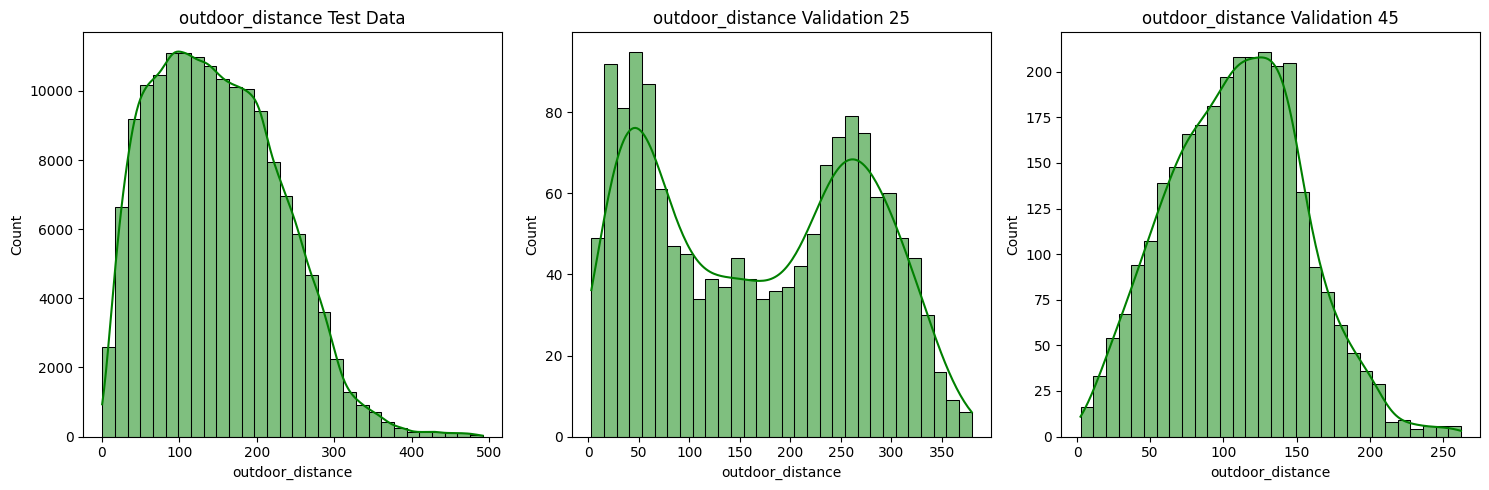

In [ ]:



# Set the color palette


# Create a figure and a grid of subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Path Loss Distribution with KDE for Test Data
sns.histplot(Test_data['outdoor_distance'], kde=True, bins=30, ax=axes[0], color='green')
axes[0].set_xlabel("outdoor_distance")
axes[0].set_ylabel("Count")
axes[0].set_title("outdoor_distance Test Data")

# Plot 2: Path Loss Distribution with KDE for Validation 25 Data
sns.histplot(Validation_data_25['outdoor_distance'], kde=True, bins=30, ax=axes[1], color='green')
axes[1].set_xlabel("outdoor_distance")
axes[1].set_ylabel("Count")
axes[1].set_title("outdoor_distance Validation 25")

# Plot 3: Path Loss Distribution with KDE for Validation 45 Data
sns.histplot(Validation_data_45['outdoor_distance'], kde=True, bins=30, ax=axes[2], color='green')
axes[2].set_xlabel("outdoor_distance")
axes[2].set_ylabel("Count")
axes[2].set_title("outdoor_distance Validation 45")

# Adjust the layout and save the figure
plt.tight_layout()

# Show the plots
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

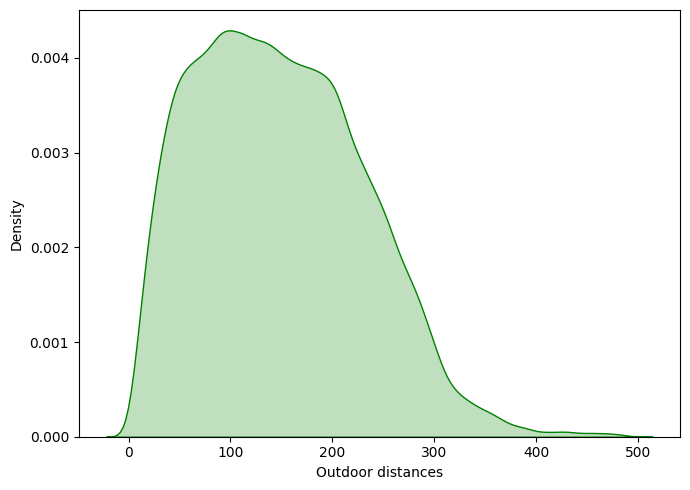

In [ ]:
# Create a figure and a grid of subplots (1 row, 1 column)
fig, axes = plt.subplots(1, 1, figsize=(7, 5))

# Plot: Path Loss Distribution with KDE for Test Data
sns.kdeplot(data=Test_data, x='outdoor_distance', ax=axes, color='green', fill=True)
axes.set_xlabel("Outdoor distances")
axes.set_ylabel("Density")

# Adjust the layout and save the figure
plt.tight_layout()
plt.savefig('Outdoor distances.eps', dpi=600, bbox_inches='tight')  # Change the file name and dpi as needed
# Move the saved file to the content folder
!mv 'Outdoor distances.eps' '/content/drive/My Drive/ESP files/Outdoor_distances.eps'

files.download('/content/drive/My Drive/ESP files/Outdoor_distances.eps')
# Show the plot
plt.show()


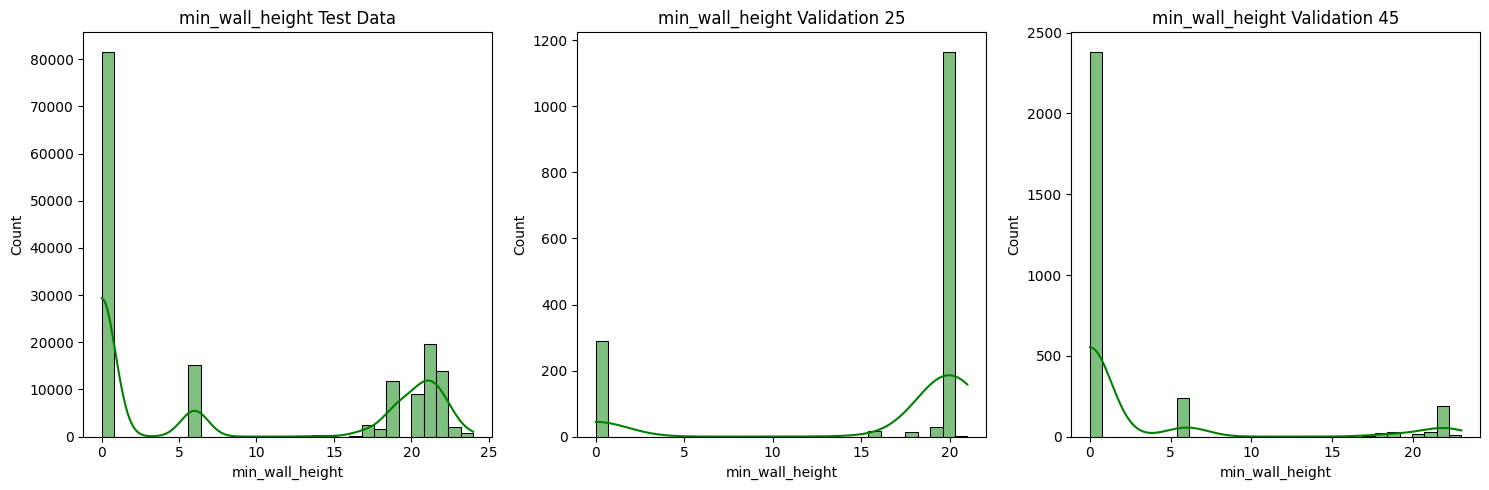

In [ ]:





# Set the color palette


# Create a figure and a grid of subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Path Loss Distribution with KDE for Test Data
sns.histplot(Test_data['min_wall_height'], kde=True, bins=30, ax=axes[0], color='green')
axes[0].set_xlabel("min_wall_height")
axes[0].set_ylabel("Count")
axes[0].set_title("min_wall_height Test Data")

# Plot 2: Path Loss Distribution with KDE for Validation 25 Data
sns.histplot(Validation_data_25['min_wall_height'], kde=True, bins=30, ax=axes[1], color='green')
axes[1].set_xlabel("min_wall_height")
axes[1].set_ylabel("Count")
axes[1].set_title("min_wall_height Validation 25")

# Plot 3: Path Loss Distribution with KDE for Validation 45 Data
sns.histplot(Validation_data_45['min_wall_height'], kde=True, bins=30, ax=axes[2], color='green')
axes[2].set_xlabel("min_wall_height")
axes[2].set_ylabel("Count")
axes[2].set_title("min_wall_height Validation 45")

# Adjust the layout and save the figure
plt.tight_layout()

# Show the plots
plt.show()



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

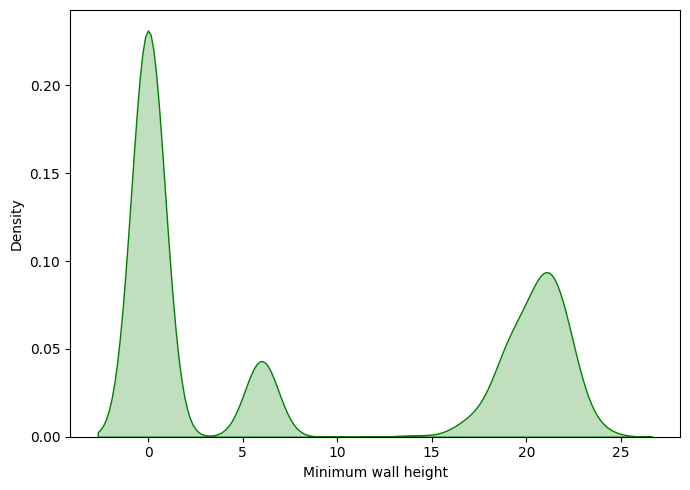

In [ ]:
# Create a figure and a grid of subplots (1 row, 1 column)
fig, axes = plt.subplots(1, 1, figsize=(7, 5))

# Plot: Path Loss Distribution with KDE for Test Data
sns.kdeplot(data=Test_data, x='min_wall_height', ax=axes, color='green', fill=True)
axes.set_xlabel("Minimum wall height")
axes.set_ylabel("Density")

# Adjust the layout and save the figure
plt.tight_layout()
plt.savefig('Minimum wall height.eps', dpi=600, bbox_inches='tight')  # Change the file name and dpi as needed
# Move the saved file to the content folder
!mv 'Minimum wall height.eps' '/content/drive/My Drive/ESP files/Minimum_wall_height.eps'

files.download('/content/drive/My Drive/ESP files/Minimum_wall_height.eps')
# Show the plot
plt.show()


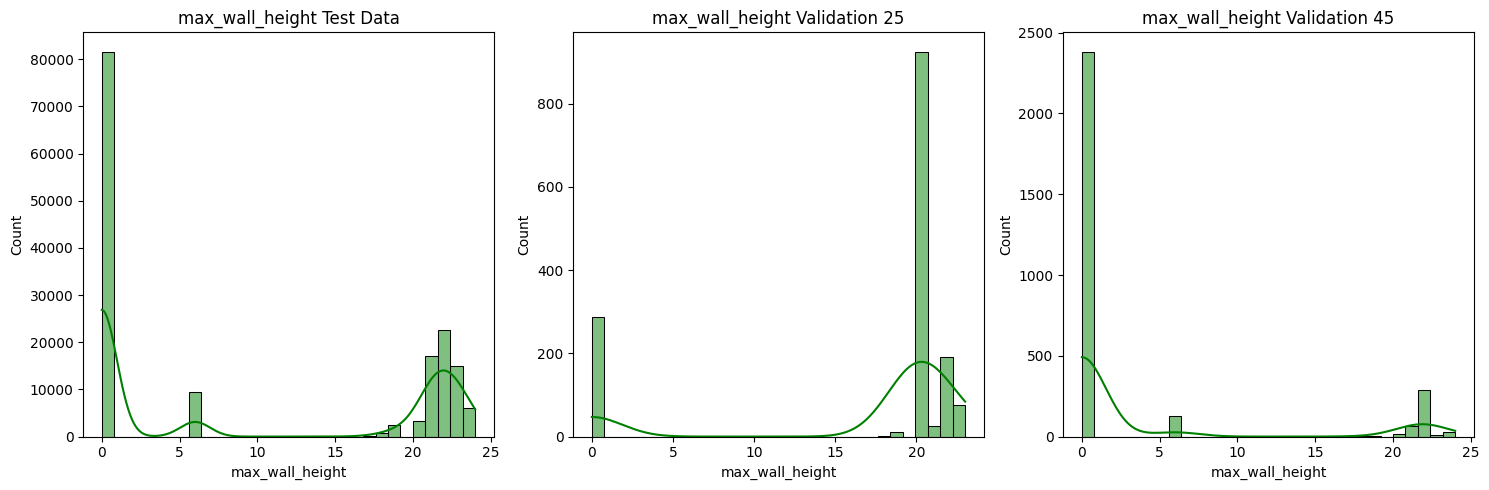

In [ ]:
# Set the color palette


# Create a figure and a grid of subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Path Loss Distribution with KDE for Test Data
sns.histplot(Test_data['max_wall_height'], kde=True, bins=30, ax=axes[0], color='green')
axes[0].set_xlabel("max_wall_height")
axes[0].set_ylabel("Count")
axes[0].set_title("max_wall_height Test Data")

# Plot 2: Path Loss Distribution with KDE for Validation 25 Data
sns.histplot(Validation_data_25['max_wall_height'], kde=True, bins=30, ax=axes[1], color='green')
axes[1].set_xlabel("max_wall_height")
axes[1].set_ylabel("Count")
axes[1].set_title("max_wall_height Validation 25")

# Plot 3: Path Loss Distribution with KDE for Validation 45 Data
sns.histplot(Validation_data_45['max_wall_height'], kde=True, bins=30, ax=axes[2], color='green')
axes[2].set_xlabel("max_wall_height")
axes[2].set_ylabel("Count")
axes[2].set_title("max_wall_height Validation 45")

# Adjust the layout and save the figure
plt.tight_layout()

# Show the plots
plt.show()



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

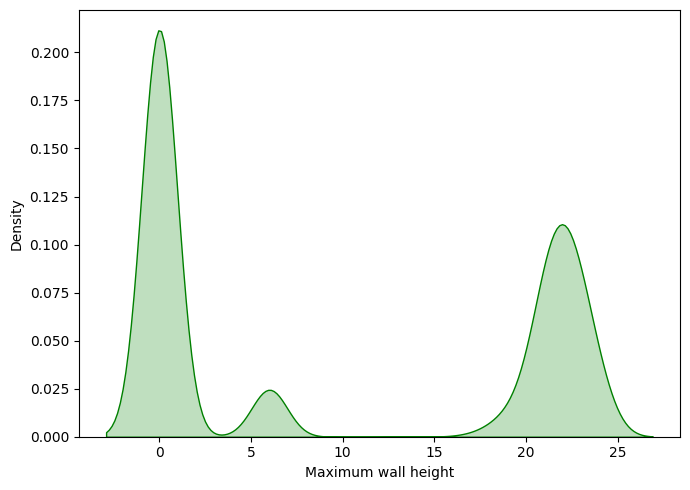

In [ ]:
# Create a figure and a grid of subplots (1 row, 1 column)
fig, axes = plt.subplots(1, 1, figsize=(7, 5))

# Plot: Path Loss Distribution with KDE for Test Data
sns.kdeplot(data=Test_data, x='max_wall_height', ax=axes, color='green', fill=True)
axes.set_xlabel("Maximum wall height")
axes.set_ylabel("Density")

# Adjust the layout and save the figure
plt.tight_layout()
plt.savefig('Maximum wall height.eps', dpi=600, bbox_inches='tight')  # Change the file name and dpi as needed
# Move the saved file to the content folder
!mv 'Maximum wall height.eps' '/content/drive/My Drive/ESP files/Maximum_wall_height.eps'

files.download('/content/drive/My Drive/ESP files/Maximum_wall_height.eps')
# Show the plot
plt.show()


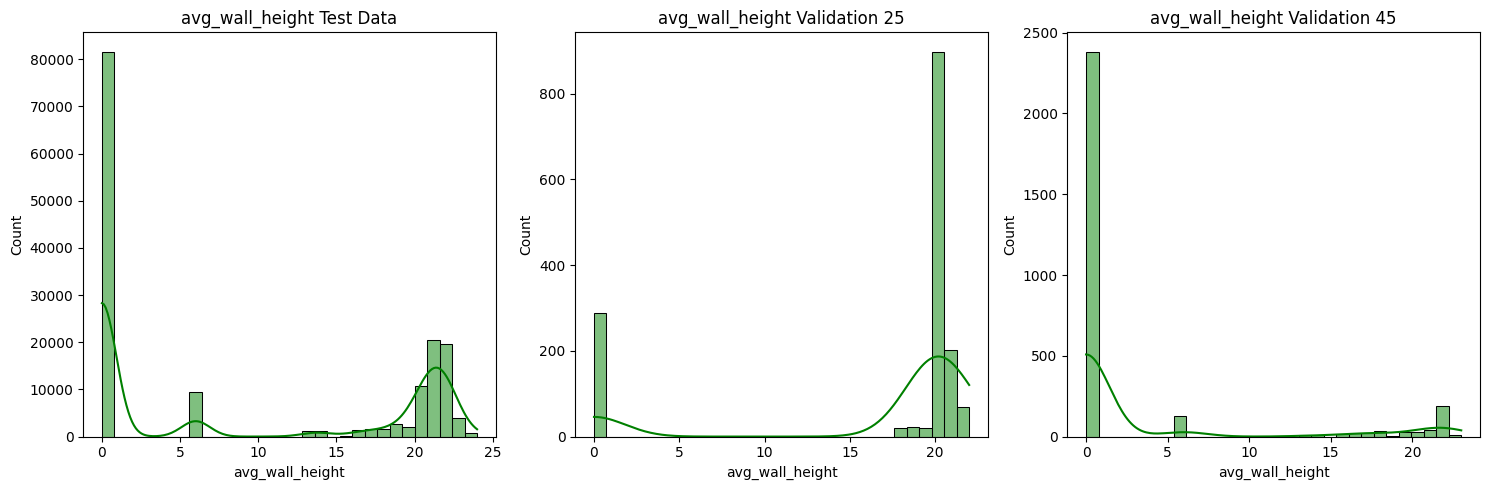

In [ ]:

# Set the color palette


# Create a figure and a grid of subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Path Loss Distribution with KDE for Test Data
sns.histplot(Test_data['avg_wall_height'], kde=True, bins=30, ax=axes[0], color='green')
axes[0].set_xlabel("avg_wall_height")
axes[0].set_ylabel("Count")
axes[0].set_title("avg_wall_height Test Data")

# Plot 2: Path Loss Distribution with KDE for Validation 25 Data
sns.histplot(Validation_data_25['avg_wall_height'], kde=True, bins=30, ax=axes[1], color='green')
axes[1].set_xlabel("avg_wall_height")
axes[1].set_ylabel("Count")
axes[1].set_title("avg_wall_height Validation 25")

# Plot 3: Path Loss Distribution with KDE for Validation 45 Data
sns.histplot(Validation_data_45['avg_wall_height'], kde=True, bins=30, ax=axes[2], color='green')
axes[2].set_xlabel("avg_wall_height")
axes[2].set_ylabel("Count")
axes[2].set_title("avg_wall_height Validation 45")

# Adjust the layout and save the figure
plt.tight_layout()

# Show the plots
plt.show()



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

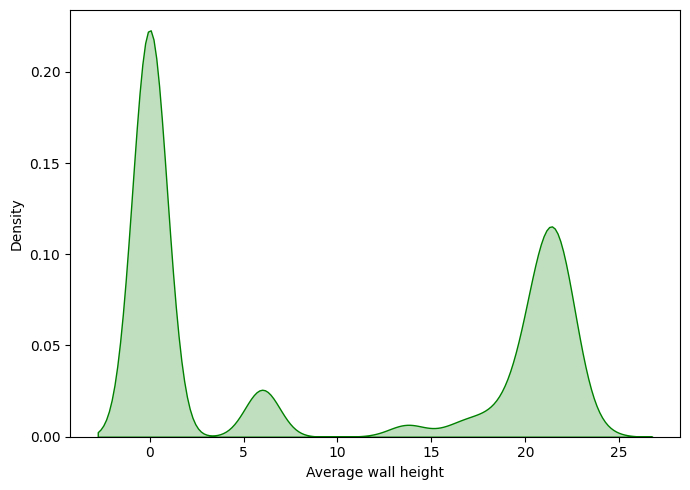

In [ ]:
# Create a figure and a grid of subplots (1 row, 1 column)
fig, axes = plt.subplots(1, 1, figsize=(7, 5))

# Plot: Path Loss Distribution with KDE for Test Data
sns.kdeplot(data=Test_data, x='avg_wall_height', ax=axes, color='green', fill=True)
axes.set_xlabel("Average wall height")
axes.set_ylabel("Density")

# Adjust the layout and save the figure
plt.tight_layout()
plt.savefig('Averange wall height.eps', dpi=600, bbox_inches='tight')  # Change the file name and dpi as needed
# Move the saved file to the content folder
!mv 'Averange wall height.eps' '/content/drive/My Drive/ESP files/Averange_wall_height.eps'

files.download('/content/drive/My Drive/ESP files/Averange_wall_height.eps')
# Show the plot
plt.show()


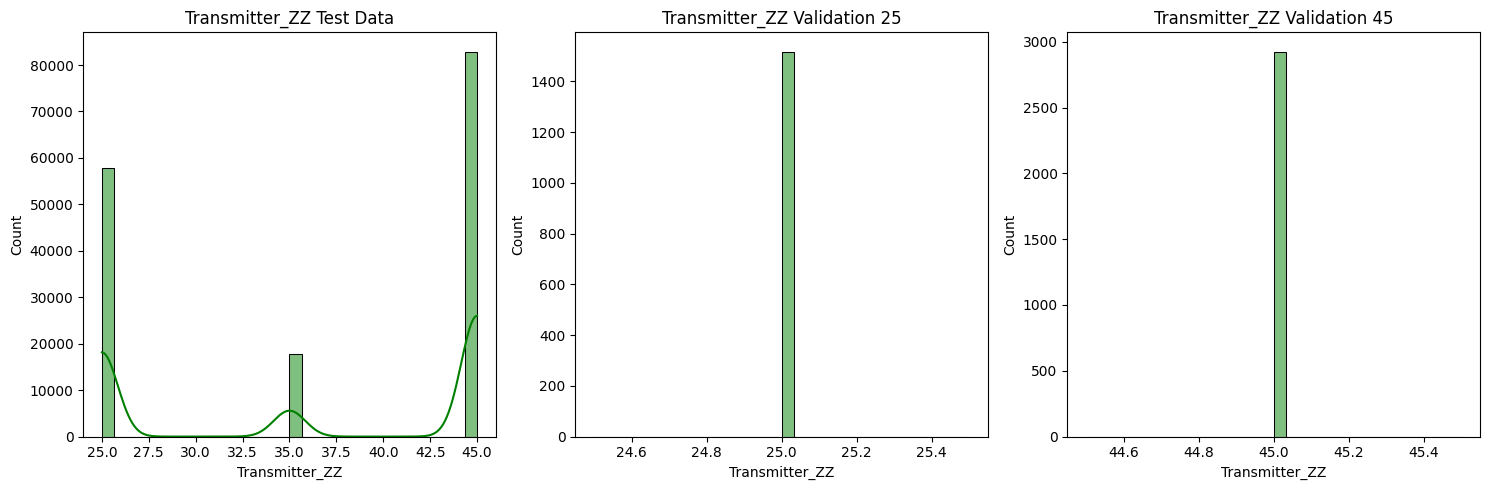

In [ ]:


# Set the color palette


# Create a figure and a grid of subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Path Loss Distribution with KDE for Test Data
sns.histplot(Test_data['Transmitter_ZZ'], kde=True, bins=30, ax=axes[0], color='green')
axes[0].set_xlabel("Transmitter_ZZ")
axes[0].set_ylabel("Count")
axes[0].set_title("Transmitter_ZZ Test Data")

# Plot 2: Path Loss Distribution with KDE for Validation 25 Data
sns.histplot(Validation_data_25['Transmitter_ZZ'], kde=True, bins=30, ax=axes[1], color='green')
axes[1].set_xlabel("Transmitter_ZZ")
axes[1].set_ylabel("Count")
axes[1].set_title("Transmitter_ZZ Validation 25")

# Plot 3: Path Loss Distribution with KDE for Validation 45 Data
sns.histplot(Validation_data_45['Transmitter_ZZ'], kde=True, bins=30, ax=axes[2], color='green')
axes[2].set_xlabel("Transmitter_ZZ")
axes[2].set_ylabel("Count")
axes[2].set_title("Transmitter_ZZ Validation 45")

# Adjust the layout and save the figure
plt.tight_layout()

# Show the plots
plt.show()



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

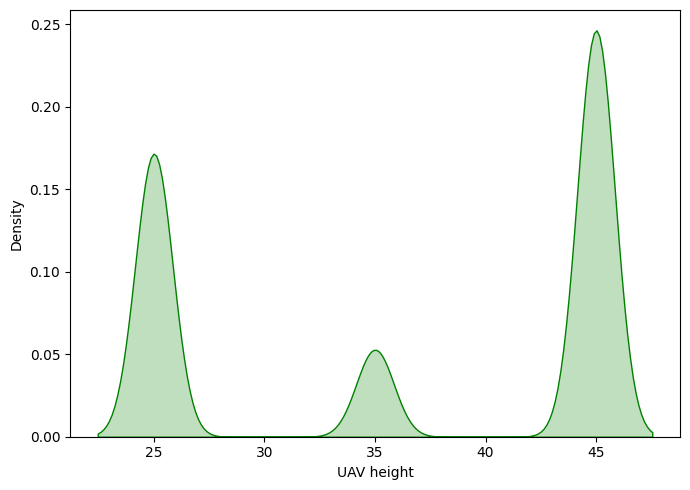

In [ ]:
# Create a figure and a grid of subplots (1 row, 1 column)
fig, axes = plt.subplots(1, 1, figsize=(7, 5))

# Plot: Path Loss Distribution with KDE for Test Data
sns.kdeplot(data=Test_data, x='Transmitter_ZZ', ax=axes, color='green', fill=True)
axes.set_xlabel("UAV height")
axes.set_ylabel("Density")

# Adjust the layout and save the figure
plt.tight_layout()
plt.savefig('UAV height.eps', dpi=600, bbox_inches='tight')  # Change the file name and dpi as needed
# Move the saved file to the content folder
!mv 'UAV height.eps' '/content/drive/My Drive/ESP files/UAV_height.eps'

files.download('/content/drive/My Drive/ESP files/UAV_height.eps')
# Show the plot
plt.show()


ValueError: ignored

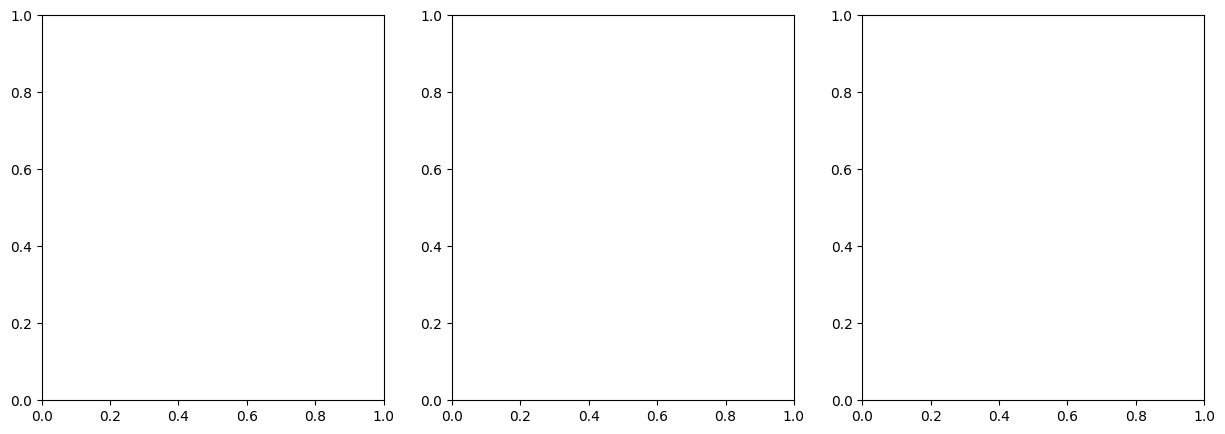

In [ ]:
# Create a figure for each subplot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# Plot 1: Path Loss Distribution with KDE for Test Data
sns.kdeplot(x='3d_distance', y='LR_Path_Loss_test', data=Test_data, kind='hex', ax=axes[0], color='green', fill=True)
axes[0].set_xlabel("Path Loss [dB]")
axes[0].set_ylabel("Count")
axes[0].set_title("Path Loss Distribution Test Data")

# Plot 2: Path Loss Distribution with KDE for Validation 25 Data
sns.kdeplot(x='3d_distance', y='Path_loss_average', data=Validation_data_25, kind='hex', ax=axes[1], color='green', fill=True)
axes[1].set_xlabel("Path Loss [dB]")
axes[1].set_ylabel("Count")
axes[1].set_title("Path Loss Distribution Validation 25")

# Plot 3: Path Loss Distribution with KDE for Validation 45 Data
sns.kdeplot(x='3d_distance', y='Path_loss_average', data=Validation_data_45, kind='hex', ax=axes[2], color='green', fill=True)
axes[2].set_xlabel("Path Loss [dB]")
axes[2].set_ylabel("Count")
axes[2].set_title("Path Loss Distribution Validation 45")

# Adjust the layout and save the figure
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new figure
distances = plt.figure(figsize=(7, 7))

# Plot the histogram with KDE
sns.histplot(Test_data['LR_Path_Loss_test'], kde=True, bins=30, color='green')

# Add labels and grid to the plot
plt.grid(True)
plt.xlabel('Path Loss (dB)', fontsize=13.5)
plt.ylabel('Count', fontsize=13.5)
# Show the plot
distances.show()
distances.savefig('Path_Loss_test.eps', dpi=600, bbox_inches='tight')  # Change the file name and dpi as needed
#files.download('Path_Loss_test.eps')



KeyError: ignored

<Figure size 700x700 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

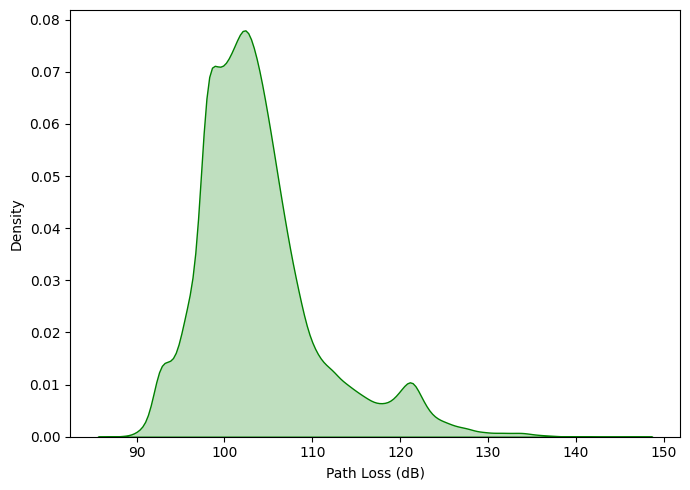

In [ ]:
# Create a figure and a grid of subplots (1 row, 1 column)
fig, axes = plt.subplots(1, 1, figsize=(7, 5))

# Plot: Path Loss Distribution with KDE for Test Data
sns.kdeplot(data=Test_data, x='Path_loss_average', ax=axes, color='green', fill=True)
axes.set_xlabel("Path Loss (dB)")
axes.set_ylabel("Density")

# Adjust the layout and save the figure
plt.tight_layout()

# Save the plot as EPS file
plt.savefig('Path Loss (dB).eps', dpi=600, bbox_inches='tight')  # Change the file name and dpi as needed
# Move the saved file to the content folder
!mv 'Path Loss (dB).eps' '/content/drive/My Drive/ESP files/Path_Loss_(dB).eps'

files.download('/content/drive/My Drive/ESP files/Path_Loss_(dB).eps')
# Show the plot
plt.show()



NameError: ignored

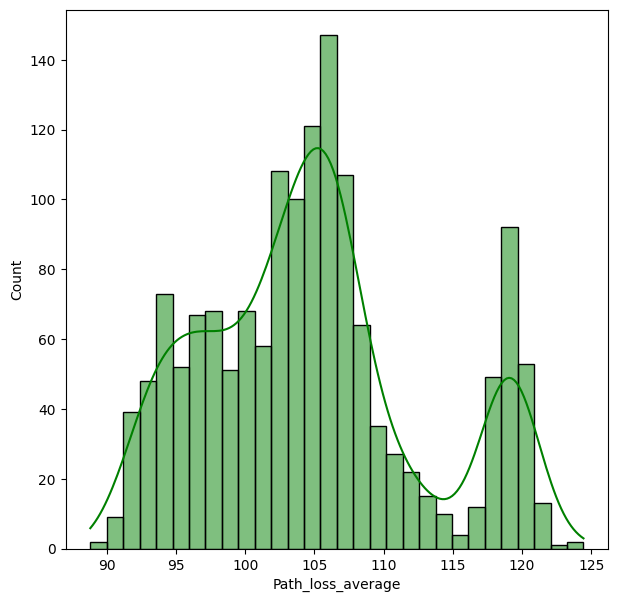

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new figure
distances = plt.figure(figsize=(7, 7))

# Plot the histogram with KDE
sns.histplot(Validation_data_25['Path_loss_average'], kde=True, bins=30, color='green')
#sns.histplot(Validation_data_25['Path_loss_average'], kde=True, bins=30, color='green')

Path_loss_average
# Add labels and grid to the plot
plt.grid(True)
plt.xlabel('Path Loss (dB)', fontsize=13.5)
plt.ylabel('Count', fontsize=13.5)
# Show the plot
distances.show()
distances.savefig('Path_Loss_Validation_data_25.eps', dpi=600, bbox_inches='tight')  # Change the file name and dpi as needed
#files.download('Path_Loss_Validation_data_25.eps')



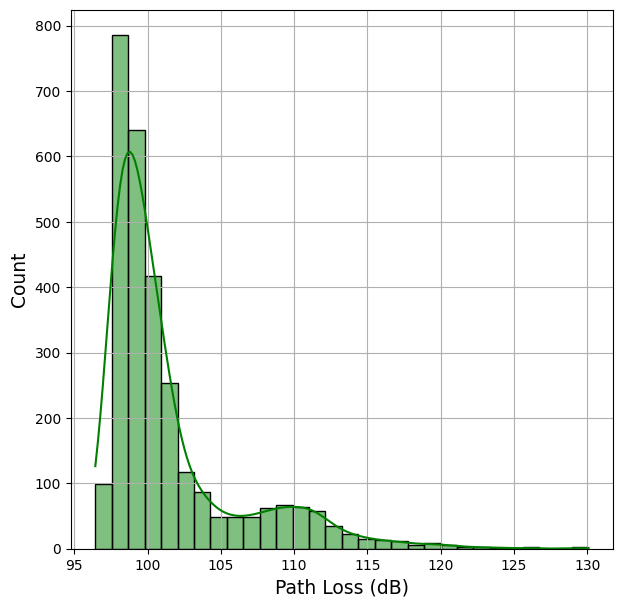

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new figure
distances = plt.figure(figsize=(7, 7))

# Plot the histogram with KDE
sns.histplot(Validation_data_45['Path_loss_average'], kde=True, bins=30, color='green')

# Add labels and grid to the plot
plt.grid(True)
plt.xlabel('Path Loss (dB)', fontsize=13.5)
plt.ylabel('Count', fontsize=13.5)
# Show the plot
distances.show()
distances.savefig('Path_Loss_Validation_data_45.eps', dpi=600, bbox_inches='tight')  # Change the file name and dpi as needed
#files.download('Path_Loss_Validation_data_45.eps')



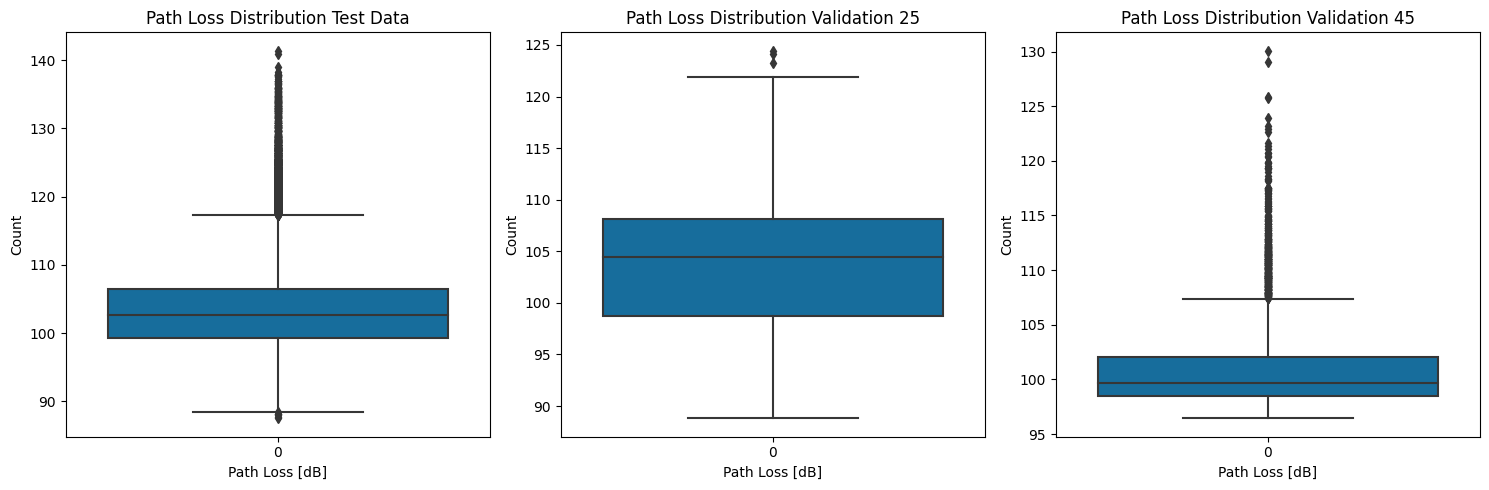

In [ ]:

# Set the color palette
sns.set_palette('colorblind')

# Create a figure and a grid of subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Path Loss Distribution with KDE for Test Data
sns.boxplot(Test_data['LR_Path_Loss_test'], ax=axes[0])
axes[0].set_xlabel("Path Loss [dB]")
axes[0].set_ylabel("Count")
axes[0].set_title("Path Loss Distribution Test Data")

# Plot 2: Path Loss Distribution with KDE for Validation 25 Data
sns.boxplot(Validation_data_25['Path_loss_average'], ax=axes[1])
axes[1].set_xlabel("Path Loss (dB)")
axes[1].set_ylabel("Count")
axes[1].set_title("Path Loss Distribution Validation 25")

# Plot 3: Path Loss Distribution with KDE for Validation 45 Data
sns.boxplot(Validation_data_45['Path_loss_average'], ax=axes[2])
axes[2].set_xlabel("Path Loss [dB]")
axes[2].set_ylabel("Count")
axes[2].set_title("Path Loss Distribution Validation 45")

# Adjust the layout and save the figure
plt.tight_layout()

# Show the plots
plt.show()

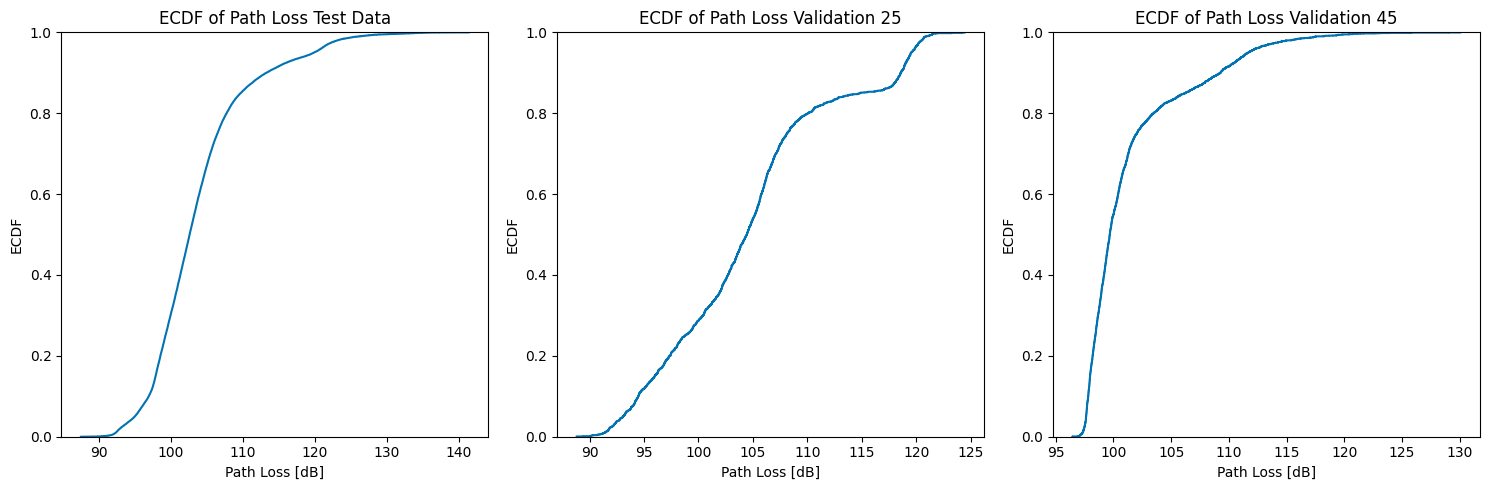

In [ ]:

# Set the color palette
sns.set_palette('colorblind')

# Create a figure and a grid of subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Path Loss Distribution with ECDF for Test Data
sns.ecdfplot(Test_data['LR_Path_Loss_test'], ax=axes[0])
axes[0].set_xlabel("Path Loss [dB]")
axes[0].set_ylabel("ECDF")
axes[0].set_title("ECDF of Path Loss Test Data")

# Plot 2: Path Loss Distribution with ECDF for Validation 25 Data
sns.ecdfplot(Validation_data_25['Path_loss_average'], ax=axes[1])
axes[1].set_xlabel("Path Loss [dB]")
axes[1].set_ylabel("ECDF")
axes[1].set_title("ECDF of Path Loss Validation 25")

# Plot 3: Path Loss Distribution with ECDF for Validation 45 Data
sns.ecdfplot(Validation_data_45['Path_loss_average'], ax=axes[2])
axes[2].set_xlabel("Path Loss [dB]")
axes[2].set_ylabel("ECDF")
axes[2].set_title("ECDF of Path Loss Validation 45")

# Adjust the layout and save the figure
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
sns.regplot(x='3d_distance', y='Path_loss',marker = '.',truncate = False,x_ci = "sd",data=pathloss)

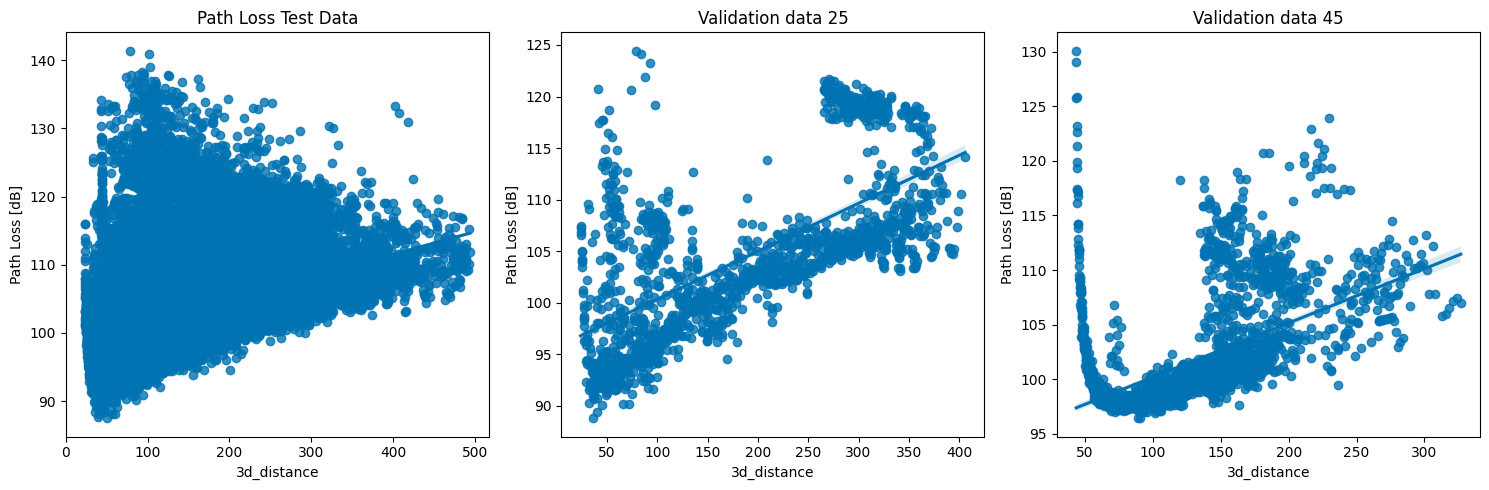

In [ ]:

# Set the color palette
sns.set_palette('colorblind')

# Create a figure and a grid of subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Path Loss Distribution with ECDF for Test Data
sns.regplot(x=Test_data['3d_distance'], y = Test_data['LR_Path_Loss_test'], ax=axes[0])
axes[0].set_ylabel("Path Loss [dB]")
axes[0].set_xlabel("3d_distance")
axes[0].set_title("Path Loss Test Data")

# Plot 2: Path Loss Distribution with ECDF for Validation 25 Data
sns.regplot(x=Validation_data_25['3d_distance'], y = Validation_data_25['Path_loss_average'], ax=axes[1])
axes[1].set_ylabel("Path Loss [dB]")
axes[1].set_xlabel("3d_distance")
axes[1].set_title("Validation data 25")

# Plot 3: Path Loss Distribution with ECDF for Validation 45 Data
sns.regplot(x=Validation_data_45['3d_distance'], y = Validation_data_45['Path_loss_average'], ax=axes[2])
axes[2].set_ylabel("Path Loss [dB]")
axes[2].set_xlabel("3d_distance")
axes[2].set_title("Validation data 45")

# Adjust the layout and save the figure
plt.tight_layout()

# Show the plots
plt.show()